# Boston Housing Price 🏡💵💸

https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Assignments/Home_Work_Linear_Regression.ipynb

# 1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 📖👓

In [53]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head()

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### The dataset has 506 rows and 14 cols 

In [54]:
bos.shape

(506, 14)

In [61]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 📈📊📉

In [62]:
#import data viz libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Information about each column data type ℹ️

In [63]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Quantitative information about the dataset 🔢

In [64]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
bos["PRICE"].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: PRICE, Length: 229, dtype: int64

## As crime-rate increases, the housing price and quantity decreases

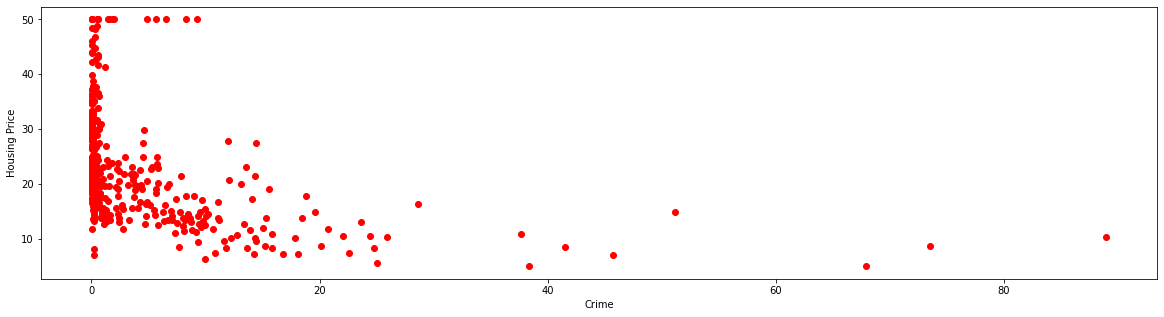

In [68]:
plt.figure(figsize=(20, 5))
x = bos["CRIM"]
y = bos["PRICE"]
plt.xlabel("Crime")
plt.ylabel("Housing Price")
plt.plot(x, y, 'ro')

## Most housings are found closer to employment centers

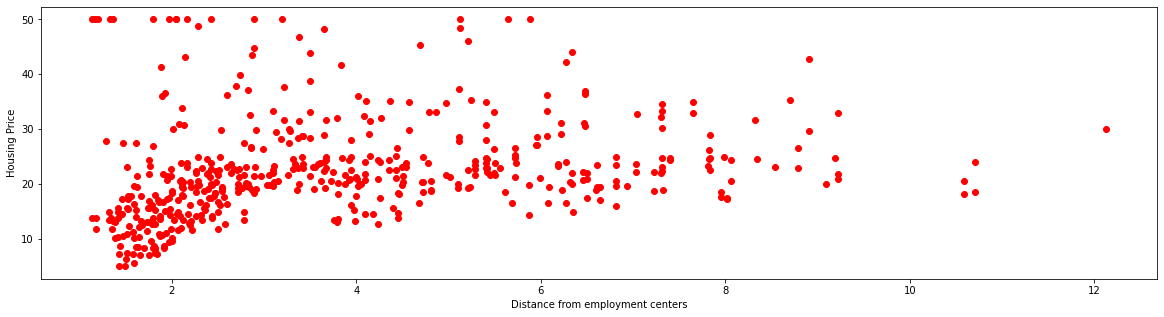

In [71]:
plt.figure(figsize=(20, 5))
x = bos["DIS"]
y = bos["PRICE"]
plt.xlabel("Distance from employment centers")
plt.ylabel("Housing Price")
plt.plot(x, y, 'ro')

# 3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.) 📈

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:

bos_heat = pd.DataFrame(boston.data)
bos_heat.columns = boston.feature_names
bos_heat.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#calculate the correlation matrix
corr = bos_heat.corr()

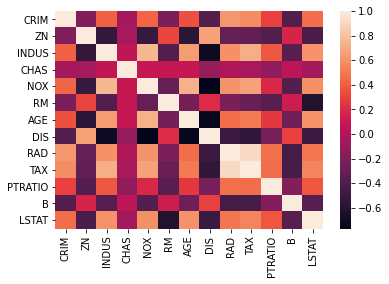

In [15]:
# plot the heatmap
sns.heatmap(corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

# 4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part. 🏋

In [21]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# A function that takes x and y and returns the model with the accuracy

In [38]:
def build_model(x, y):
    #split x and y into training and testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
    #instantiate linear reg
    lr_reg = LinearRegression()
    #train x and y
    lr_reg.fit(x_train, y_train)
    y_pred = lr_reg.predict(x_test)
    print("y_pred", y_pred)
    print("Intercept",lr_reg.intercept_)
    print("Coef",lr_reg.coef_)
    #accuracy of the model
    print("Accuracy score",lr_reg.score(x_test, y_test))
    print("r2 score",r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
    print("Mean squared error",mean_squared_error(y_test, y_pred))
    #plot outputs
    return x_test, y_test, y_pred

In [39]:
#Grab the feature columns
feature_cols = boston.feature_names
#convert np array to list
feature_cols = feature_cols.tolist()
feature_cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [40]:
# find x and y
x = bos[feature_cols]
y = bos['PRICE'] #the one we want to predict

In [44]:
#pass x and y to the build model function
x_test, y_test, y_pred = build_model(x, y)

y_pred [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147

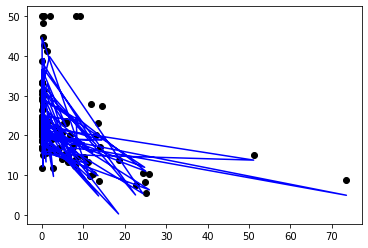

In [45]:
plt.scatter(x_test.iloc[:,0], y_test, color='black')
plt.plot(x_test.iloc[:,0], y_pred, color='blue')

# Apply data normalization (Scaling) to improve the prediction result ⚖️

## Method 1: Using MinMaxScaler

In [46]:
min_max = MinMaxScaler() #initialize
bos_min_max = min_max.fit_transform(bos[feature_cols])
# find x and y
x= bos_min_max
y= bos['PRICE'] #the one we want to predict

In [48]:
x_test, y_test, y_pred = build_model(x, y)

y_pred [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147

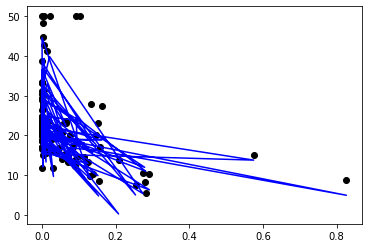

In [49]:
plt.scatter(x_test[:,0], y_test, color='black')
plt.plot(x_test[:,0], y_pred, color='blue')

## Method 2: Using Standard Scaler

In [50]:
std = StandardScaler() #initialize standard scaler
bos_std = std.fit_transform(bos[feature_cols])
# find x and y
x_std= bos_std
y_std= bos['PRICE'] #the one we want to predict


In [51]:
x_test, y_test, y_pred = build_model(x_std, y_std)

y_pred [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 20.72654169 17.52545047 24.45596997 30.10668865
 13.31250981 21.52052342 20.65642932 15.34285652 13.7741129  22.07429287
 17.53293957 21.60707766 32.91050188 31.32796114 17.64346364 32.69909854
 18.56579207 19.32110821 18.81256692 23.04351442 22.81649956 23.99800754
 30.62733254 28.8662207  25.78198145  5.00689605 36.83409088 23.80490328
 27.36965299 19.33057146 28.51439846 19.19147

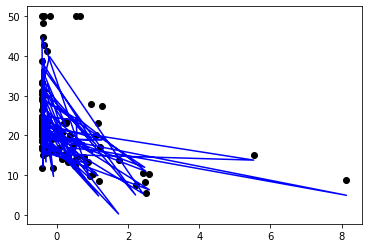

In [52]:
plt.scatter(x_test[:,0], y_test, color='black')
plt.plot(x_test[:,0], y_pred, color='blue')

## In conclusion, looking at the r2 score and mean squared error we can observe that scaling the data didn't bring a difference in the accuracy of the model 😪